In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df = pd.read_csv('../../../data/Social_Network_Ads.csv')
df = df.iloc[:,2:]
df.sample(5)


,Age,EstimatedSalary,Purchased
256,41,72000,0
21,47,49000,1
74,32,18000,0
299,46,117000,1
136,20,82000,0


# Train Test Split

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280,), (120,))

# Standard Scaler

In [184]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()# --> x(i)-x(mean)/standard_deviation

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform the train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [185]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [186]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [187]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [188]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

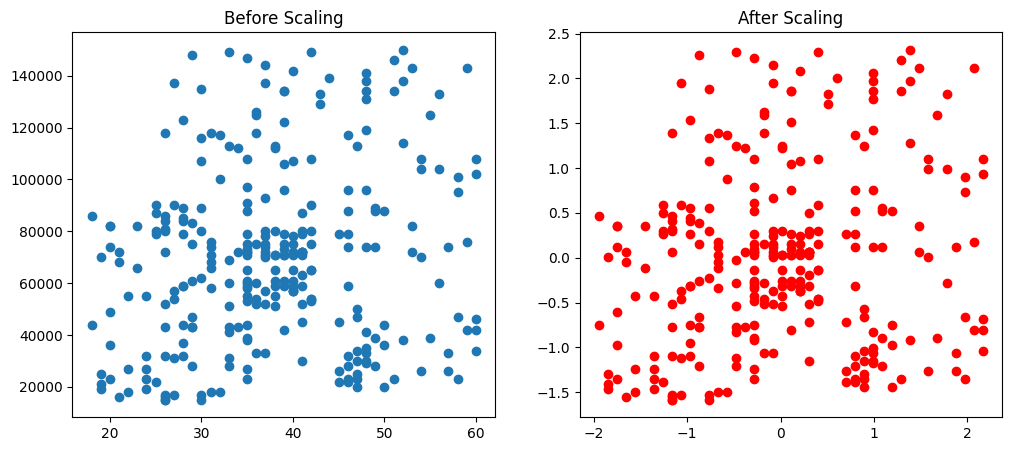

In [189]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

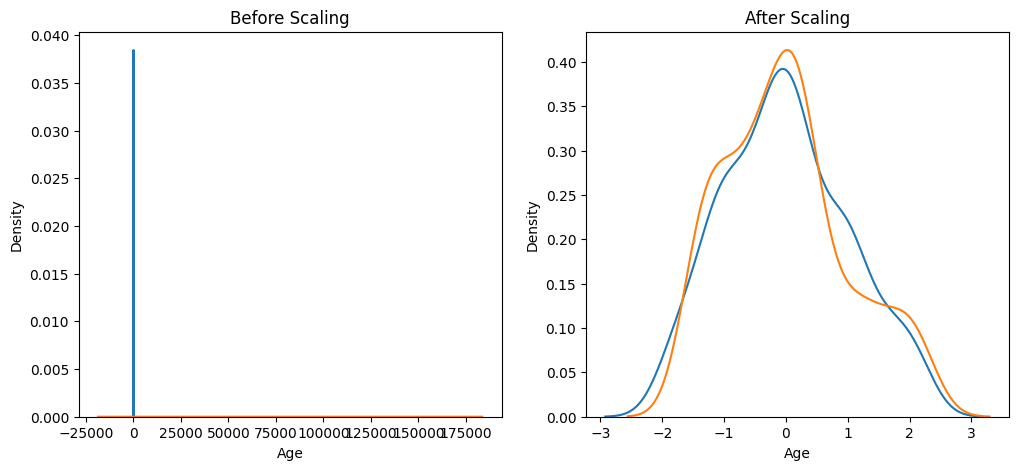

In [190]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

# Why Scaling is important ?

In [191]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression is a algorithm which reqiures the values to be on similar scale for proper prediction

In [192]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [193]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [194]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr.predict(X_test_scaled)

In [195]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Actual accuracy :',accuracy_score(y_test,y_pred))
print('Scaled accuracy :',accuracy_score(y_test,y_pred_scaled))
# I don't know why scaled accuracy is lower but I am very tired now to check so will do it later same for decision tree

Actual accuracy : 0.875
Scaled accuracy : 0.6583333333333333


In [202]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [204]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [205]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt.predict(X_test_scaled)

In [208]:
print('Actual accuracy :',accuracy_score(y_test,y_pred))
print('Scaled accuracy :',accuracy_score(y_test,y_pred_scaled))

Actual accuracy : 0.875
Scaled accuracy : 0.6583333333333333
